### Written Homework 4: Question 25

In [13]:
#import statements:

from typing import Optional, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [14]:
# making a random FC ANN class:

class classifier():
    def __init__(self, weight_range: Tuple[int, int] = (-10,10)):
        self.weight_range = weight_range
        self.w = np.random.uniform(weight_range[0], weight_range[1], size=(6,))

    def do_predict(self, input: np.ndarray, rounding: bool = True):
        hidden_one = 1/(1+np.exp(self.w[0]*input[0] + self.w[2]*input[1]))
        hidden_two = 1/(1+np.exp(self.w[0]*input[1] + self.w[3]*input[1]))
        output = 1/(1+np.exp(self.w[4]*hidden_one + self.w[5]*hidden_two))
        if rounding == True:
            return int(round(output))
        else:
            return output

    def get_range(self):
         return self.weight_range

In [15]:
def draw_decision_boundaries(classifier: classifier, n:int=100, sample_range: Tuple[int, int] = (-5,5)):
    # sample random examples:
    # X = np.random.uniform(sample_range[0], sample_range[1], size=(n,2))
    # Linearly-spaced X:
    o = np.linspace(-5,5,25)
    x_1 = np.outer(o,np.ones(np.size(o)))
    x_2 = np.outer(np.ones(np.size(o)), o)
    X = np.vstack((np.ravel(x_1), np.ravel(x_2))).T
    y_hat = np.zeros(np.size(X[:,0]))
    for i in range(np.size(X[:,0])):
        y_hat[i] = classifier.do_predict(input = X[i])
    X_zero = X[y_hat==0]
    print('How many classified as zero: ' + str(len(X_zero[:,0])))
    X_one = X[y_hat==1]
    print('How many classified as one: ' + str(len(X_one[:,0])))
    fig = plt.figure()
    fig.patch.set_facecolor('#ffffff')
    plt.scatter(X_zero[:,0],X_zero[:,1], color = purples[2], label = 'y=zero')
    plt.scatter(X_one[:,0],X_one[:,1], color = purples[6], label = 'y=one')
    plt.xlim((-5,5))
    plt.ylim((-5,5))
    plt.legend()
    plt.title(str(classifier.get_range()) + ' classifier')
    plt.xlabel('x1 (input)')
    plt.ylabel('x2 (input)')
    plt.show()
    


In [16]:
def draw_output_3D(classifier: classifier, sample_range: Tuple[int, int] = (-5,5)):
    # Linearly-spaced X
    x_1_o = np.arange(-5, 5, 0.25)
    x_2_o = np.arange(-5, 5, 0.25)
    x_1, x_2 = np.meshgrid(x_1_o, x_2_o)
    Z = np.zeros(np.shape(x_1))
    for i in range(len(x_1_o)):
        for j in range(len(x_2_o)):
            Z[i,j] = classifier.do_predict(input = np.array([x_1_o[i], x_2_o[j]],), rounding=False)
    fig = plt.figure() 
    fig.patch.set_facecolor('#ffffff')
    axes = plt.axes(projection ='3d') 
    axes.plot_surface(x_1, x_2, Z, color = purples[2])   
    plt.show()

##### (i) (-10,10) weight range

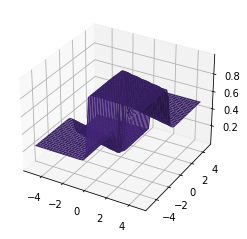

How many classified as zero: 349
How many classified as one: 276


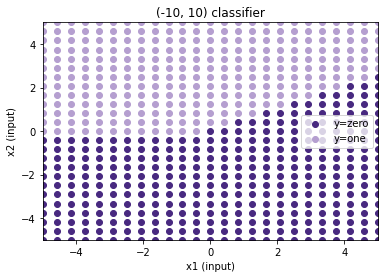

In [30]:
classifier_10_10 = classifier((-10,10))
draw_output_3D(classifier_10_10);
draw_decision_boundaries(classifier_10_10, n=1000)

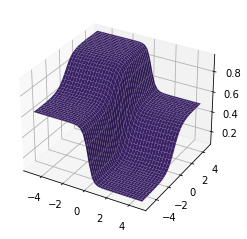

How many classified as zero: 288
How many classified as one: 337


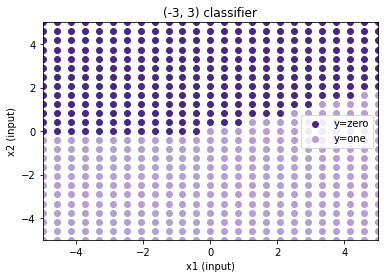

In [27]:
classifier_3_3 = classifier((-3,3))
draw_output_3D(classifier_3_3);
draw_decision_boundaries(classifier_3_3, n=1000)

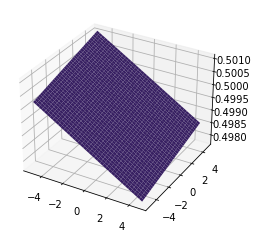

How many classified as zero: 458
How many classified as one: 167


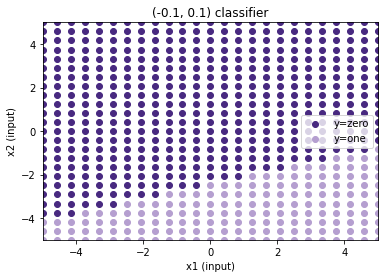

In [40]:
classifier_01_01 = classifier((-0.1,0.1))
draw_output_3D(classifier_01_01);
draw_decision_boundaries(classifier_01_01, n=1000)

In [20]:
o = np.linspace(-5,5,11)

In [21]:
x_1 = np.outer(o,np.ones(np.size(o)))

In [22]:
x_2 = np.outer(np.ones(np.size(o)), o)

In [23]:
X = np.vstack((np.ravel(x_1), np.ravel(x_2))).T

In [24]:
X[0]

array([-5., -5.])